In [1]:
!pip install pyodbc

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
server = 'techentdec.database.windows.net'  
database = 'QAECECRM_dec'                   
username = 'dbadmin'                
password = 'DashTech1234'         
connection_string = f"""
Driver={{ODBC Driver 17 for SQL Server}};
Server={server};
Database={database};
Uid={username};
Pwd={password};
Encrypt=yes;
TrustServerCertificate=no;
Connection Timeout=30;
"""

try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print(f"Connection failed: {e}")
    exit()

sql_query = """
SELECT * from [dbo].[Contract]

"""

df = pd.read_sql(sql_query, connection)
print(df.head()) 

Connection successful!
   ContractId  AgentId  OfficeId  ContractStatusId  LineOfBusinessId   Gross  \
0      100304        0      17.0                 3               2.0  1700.0   
1      101731      419       1.0                 6               3.0   550.0   
2      103324        0       1.0                 4               3.0  2000.0   
3      103331      313       1.0                 5               3.0  1500.0   
4      103526        0       1.0                 3               3.0  1000.0   

   BlueCardId  LeadSourceId  ContractTypeId IsReseller  ...  CreatedDate  \
0         NaN           3.0             1.0       True  ...   1988-09-15   
1         NaN           5.0             1.0       True  ...   1989-01-03   
2         NaN           5.0             1.0      False  ...   2001-04-28   
3         NaN           5.0             1.0       True  ...   1989-04-28   
4         NaN           5.0             1.0      False  ...   1989-05-15   

  CreatedById             UpdatedDate U

In [9]:
for col in df.columns:
    print(df[col].isna().value_counts())


False    303633
Name: ContractId, dtype: int64
False    303633
Name: AgentId, dtype: int64
False    301890
True       1743
Name: OfficeId, dtype: int64
False    303633
Name: ContractStatusId, dtype: int64
False    301890
True       1743
Name: LineOfBusinessId, dtype: int64
False    303633
Name: Gross, dtype: int64
True     272698
False     30935
Name: BlueCardId, dtype: int64
False    301890
True       1743
Name: LeadSourceId, dtype: int64
False    301890
True       1743
Name: ContractTypeId, dtype: int64
False    301890
True       1743
Name: IsReseller, dtype: int64
True     290670
False     12963
Name: ResellerId, dtype: int64
False    301744
True       1889
Name: ContractDueDate, dtype: int64
False    301890
True       1743
Name: ContractDueFromId, dtype: int64
False    301890
True       1743
Name: IsBuySell, dtype: int64
False    301890
True       1743
Name: IsNoIssue, dtype: int64
False    301890
True       1743
Name: IsSubstitute, dtype: int64
False    301890
True       1743
Name

**1.) Data Cleaning**

In [23]:
df['OfficeId'].fillna(0, inplace=True)

In [15]:
df['ContractStatusId'].fillna(0)

0         3
1         6
2         4
3         5
4         3
         ..
303628    3
303629    3
303630    3
303631    3
303632    2
Name: ContractStatusId, Length: 303633, dtype: int64

In [27]:
avg_gross = sum(df['Gross'])/len(df)
print(avg_gross)
df['Gross'].fillna(avg_gross, inplace=True)
df['Gross'].isna().value_counts()

3711.0306766719987


False    303633
Name: Gross, dtype: int64

In [4]:
df['BlueCardId'].fillna(0, inplace=True)
df['BlueCardId'].isna().value_counts()

False    303633
Name: BlueCardId, dtype: int64

In [6]:
df['LeadSourceId'].fillna(0, inplace=True)
df['LeadSourceId'].isna().value_counts()

False    303633
Name: LeadSourceId, dtype: int64

In [8]:
df['ContractTypeId'].fillna(0, inplace=True)
df['ContractTypeId'].isna().value_counts()

False    303633
Name: ContractTypeId, dtype: int64

In [18]:
df['ResellerId'].fillna(0, inplace=True)
df['ResellerId'].isna().value_counts()

False    303633
Name: ResellerId, dtype: int64

In [25]:
df['ContractDueDate'].fillna(method='ffill', inplace=True)
df['ContractDueDate'].isna().value_counts()

False    303633
Name: ContractDueDate, dtype: int64

In [27]:
df['ContractDueFromId'].fillna(0, inplace=True)
df['ContractDueFromId'].isna().value_counts()

False    303633
Name: ContractDueFromId, dtype: int64

In [31]:
df['EventTypeId'].fillna(0, inplace=True)
df['EventTypeId'].isna().value_counts()

False    303633
Name: EventTypeId, dtype: int64

In [33]:
df['TimezoneId'].fillna(0, inplace=True)
df['TimezoneId'].isna().value_counts()

False    303633
Name: TimezoneId, dtype: int64

In [35]:
df['PresenterId'].fillna(0, inplace=True)
df['PresenterId'].isna().value_counts()

False    303633
Name: PresenterId, dtype: int64

In [37]:
df['PresenterTypeId'].fillna(0, inplace=True)
df['PresenterTypeId'].isna().value_counts()

False    303633
Name: PresenterTypeId, dtype: int64

In [39]:
df['VenuePhysicalCountryId'].fillna(0, inplace=True)
df['VenuePhysicalCountryId'].isna().value_counts()

False    303633
Name: VenuePhysicalCountryId, dtype: int64

In [41]:
df['VenuePhysicalStateId'].fillna(0, inplace=True)
df['VenuePhysicalStateId'].isna().value_counts()

False    303633
Name: VenuePhysicalStateId, dtype: int64

In [42]:
df['IssueDate'].fillna(method='ffill', inplace=True)
df['IssueDate'].isna().value_counts()

False    303633
Name: IssueDate, dtype: int64

In [6]:
df['CancellationDate'].fillna(method='ffill', inplace=True)
df['CancellationDate'].isna().value_counts()

False    303633
Name: CancellationDate, dtype: int64

In [46]:
df['CommissionProgramId'].fillna(0, inplace=True)
df['CommissionProgramId'].isna().value_counts()

False    303633
Name: CommissionProgramId, dtype: int64

In [47]:
df['CommissionProgramAgentId'].fillna(0, inplace=True)
df['CommissionProgramAgentId'].isna().value_counts()

False    303633
Name: CommissionProgramAgentId, dtype: int64

In [48]:
df['CreatedById'].fillna(0, inplace=True)
df['CreatedById'].isna().value_counts()

False    303633
Name: CreatedById, dtype: int64

In [49]:
df['UpdatedById'].fillna(0, inplace=True)
df['UpdatedById'].isna().value_counts()

False    303633
Name: UpdatedById, dtype: int64

In [50]:
df['UpdatedDate'].fillna(method='ffill', inplace=True)
df['UpdatedDate'].isna().value_counts()

False    303633
Name: UpdatedDate, dtype: int64

In [51]:
df['ArchiveDate'].fillna(method='ffill', inplace=True)
df['ArchiveDate'].isna().value_counts()

False    303633
Name: ArchiveDate, dtype: int64

In [4]:
df['OriginalGross'].isna().value_counts()

True     302523
False      1110
Name: OriginalGross, dtype: int64

In [11]:
avg_org_gross = df['OriginalGross'].sum()/len(df)
print(avg_org_gross)
df['OriginalGross'].fillna(avg_org_gross, inplace=True)
df['OriginalGross'].isna().value_counts()

40.16742396248102


False    303633
Name: OriginalGross, dtype: int64

**2.)Data pre-processing**

In [15]:
format = '%YYYY-%mm-%dd'
def validate_date_format(format, date_format):
    try:
        pd.to_datetime(format, format=date_format)
        return True
    except:
        return False
    
df['isIssueDateValid'] = df['IssueDate'].apply(lambda x: validate_date_format(x, format))
df['isIssueDateValid'].value_counts()


True    303633
Name: isIssueDateValid, dtype: int64

In [16]:
df['IsContractDueDateValid'] = df['ContractDueDate'].apply(lambda x: validate_date_format(x, format))
df['IsContractDueDateValid'].value_counts()

True    303633
Name: IsContractDueDateValid, dtype: int64

In [17]:
df['IsArchiveDateValid'] = df['ArchiveDate'].apply(lambda x: validate_date_format(x, format))
df['IsArchiveDateValid'].value_counts()

False    166517
True     137116
Name: IsArchiveDateValid, dtype: int64

In [19]:
df['ArchiveDate'] = pd.to_datetime(df['ArchiveDate'], format=format, errors='coerce')
df['IsArchiveDateValid'] = df['ArchiveDate'].apply(lambda x: validate_date_format(x, format))
df['IsArchiveDateValid'].value_counts()

True    303633
Name: IsArchiveDateValid, dtype: int64

In [20]:
df['IsCreatedDateValid'] = df['CreatedDate'].apply(lambda x: validate_date_format(x, format))
df['IsCreatedDateValid'].value_counts()

True    303633
Name: IsCreatedDateValid, dtype: int64

In [23]:
df['IsUpdatedDateValid'] = df['UpdatedDate'].apply(lambda x:validate_date_format(x, format))
df['IsUpdatedDateValid'].value_counts()

True    303633
Name: IsUpdatedDateValid, dtype: int64

In [24]:
df['IsCancellationDateValid'] = df['CancellationDate'].apply(lambda x:validate_date_format(x, format))
df['IsCancellationDateValid'].value_counts()

True    303633
Name: IsCancellationDateValid, dtype: int64

**3.) Feature Engineering**

In [13]:
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
df['CancellationDate'] = pd.to_datetime(df['CancellationDate'], errors='coerce')
df['ContractDuration'] = abs(df['CancellationDate'].dt.year - df['CreatedDate'].dt.year)
avg_contract_duration = round(df['ContractDuration'].sum()/len(df), 3)
df['ContractDuration'].fillna(avg_contract_duration, inplace=True)
df['ContractDuration']

0.039     259129
0.000      35179
1.000       7809
2.000        955
3.000        356
4.000        103
5.000         43
6.000         26
11.000         7
13.000         7
12.000         4
7.000          4
10.000         4
9.000          3
8.000          3
23.000         1
Name: ContractDuration, dtype: int64

**4.) Exploratory Data Analysis**

In [22]:
df['ContractDurationMonths'] = df['ContractDuration']*12
df['ContractDurationMonths'].value_counts()

0.468      259129
0.000       35179
12.000       7809
24.000        955
36.000        356
48.000        103
60.000         43
72.000         26
132.000         7
156.000         7
144.000         4
84.000          4
120.000         4
108.000         3
96.000          3
276.000         1
Name: ContractDurationMonths, dtype: int64

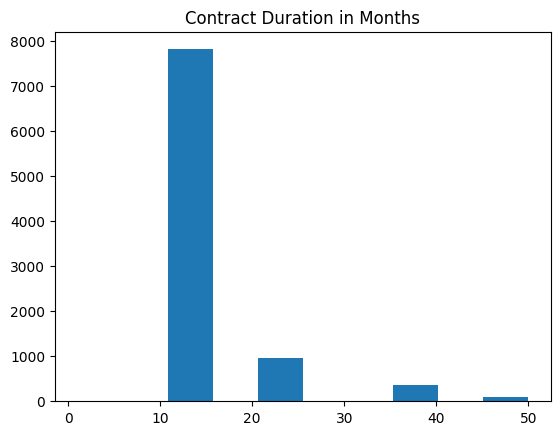

In [27]:
plt.title('Contract Duration in Months')
plt.hist(df['ContractDurationMonths'], range=(1,50))
plt.show()